In [11]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

1. hypothesis : MPG is ‘driven’ by horsepower 

(sub hypothesis … and is not affected by # cylinders)
2. visualise it with seaborn / matplotlib
3. share your code / exported image via slack or your full notebook on our class repo as plot_yourname_date (hint PULL repo to see folder studentwork or upload the file into the repo - please send me your gitname to give you write access) (edited) 

In [12]:
data = pd.read_csv('mtcars.csv')

In [13]:
data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
data.shape

(32, 12)

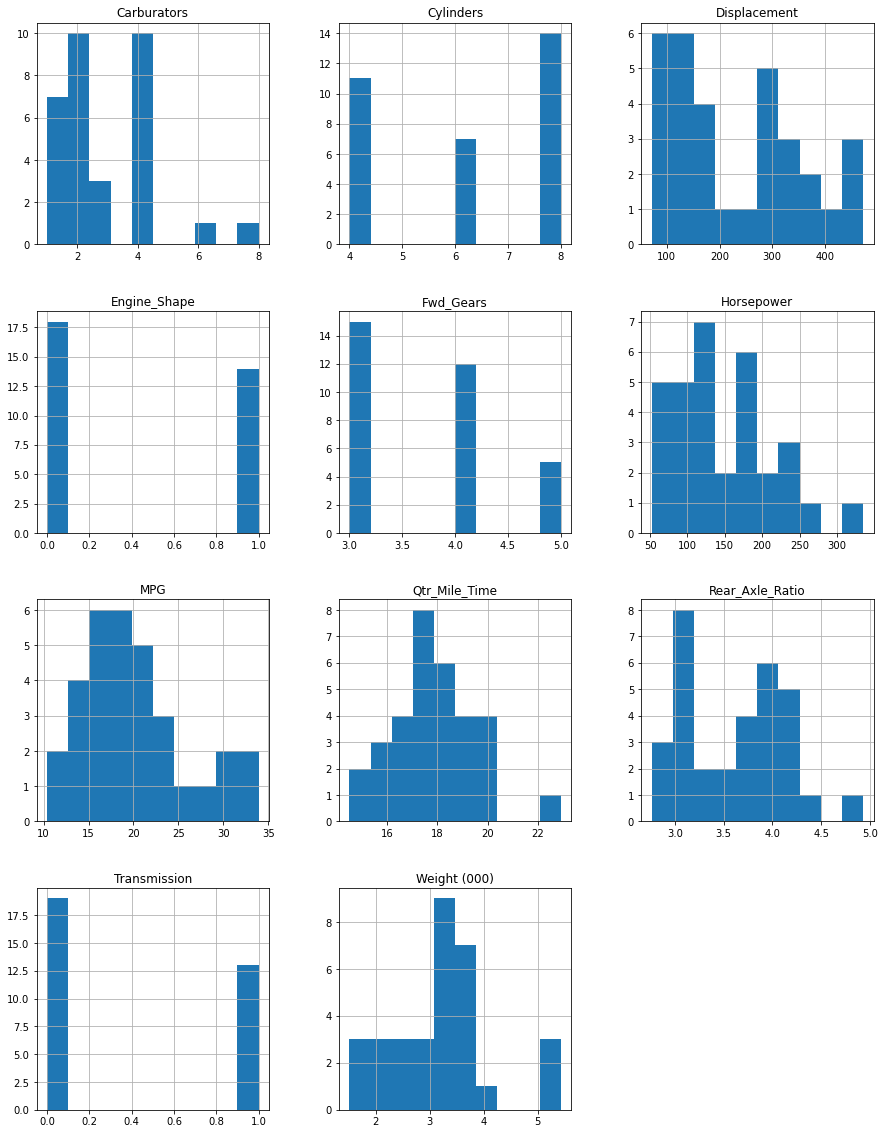

In [15]:
data.hist(figsize = (15,20));

In [16]:
#plt.scatter(x=data['MPG'],y=data['Horsepower'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            32 non-null     object 
 1   MPG              32 non-null     float64
 2   Cylinders        32 non-null     int64  
 3   Displacement     32 non-null     float64
 4   Horsepower       32 non-null     int64  
 5   Rear_Axle_Ratio  32 non-null     float64
 6   Weight (000)     32 non-null     float64
 7   Qtr_Mile_Time    32 non-null     float64
 8   Engine_Shape     32 non-null     int64  
 9   Transmission     32 non-null     int64  
 10  Fwd_Gears        32 non-null     int64  
 11  Carburators      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [18]:
correlations_matrix = data.corr()
correlations_matrix

,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
MPG,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinders,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Displacement,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
Horsepower,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
Rear_Axle_Ratio,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Weight (000),-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qtr_Mile_Time,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
Engine_Shape,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
Transmission,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Fwd_Gears,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [19]:
x = data['MPG']
y = data['Horsepower']

In [20]:
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

NameError: name 'plt' is not defined

In [21]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

NameError: name 'plt' is not defined

In [24]:
data['Cylinders']= data['Cylinders'].astype('category',copy=False)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Model            32 non-null     object  
 1   MPG              32 non-null     float64 
 2   Cylinders        32 non-null     category
 3   Displacement     32 non-null     float64 
 4   Horsepower       32 non-null     int64   
 5   Rear_Axle_Ratio  32 non-null     float64 
 6   Weight (000)     32 non-null     float64 
 7   Qtr_Mile_Time    32 non-null     float64 
 8   Engine_Shape     32 non-null     int64   
 9   Transmission     32 non-null     int64   
 10  Fwd_Gears        32 non-null     int64   
 11  Carburators      32 non-null     int64   
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 3.0+ KB
